In [127]:
#Import Libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib

In [129]:
#Load Dataset
file_path = r"C:\Users\Maryam\Desktop\BAN6800_Business_Analytics_Capstone\Module_6\LG_optimized_pricing_data.csv"
uploaded_df = pd.read_csv(file_path)

In [131]:
#Checking for missing value
print("Missing values (including hidden blanks):")
print(df.replace(r'^\s*$', pd.NA, regex=True).isna().sum())

Missing values (including hidden blanks):
Date                  0
Customer_ID           0
Customer_Type         0
Region                0
Product_ID            0
Product_Name          0
Product_Type          0
Brand                 0
Base_Price            0
Discounted_Price      0
Purchased_Quantity    0
Competitor_Name       0
Competitor_Price      0
Total_Amount          0
Cluster               0
dtype: int64


In [133]:
#Checking for Duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 0


In [137]:
#Drop Duplicate Rows
df = df.drop_duplicates()

In [139]:
#Final check
print("\nCleaned DataFrame shape:", df.shape)
print("Missing values after cleaning:")
print(df.isna().sum())


Cleaned DataFrame shape: (50, 15)
Missing values after cleaning:
Date                  0
Customer_ID           0
Customer_Type         0
Region                0
Product_ID            0
Product_Name          0
Product_Type          0
Brand                 0
Base_Price            0
Discounted_Price      0
Purchased_Quantity    0
Competitor_Name       0
Competitor_Price      0
Total_Amount          0
Cluster               0
dtype: int64


In [141]:
#Save cleaned dataset
df.to_csv("LG_dataset_cleaned.csv", index=False)

In [143]:
#Define Features and Target
X = uploaded_df[['Discounted_Price', 'Competitor_Price', 'Product_Type']]
y = uploaded_df['Purchased_Quantity']

In [145]:
#Preprocessing and Model Pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), ['Product_Type'])
    ],
    remainder='passthrough'
)

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [147]:
#Fit the Model
model_pipeline.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Product_Type'])])),
                ('regressor', LinearRegression())])

In [151]:
#Evaluate Coefficients
encoded_feature_names = model_pipeline.named_steps['preprocessor'].get_feature_names_out()
coefficients = model_pipeline.named_steps['regressor'].coef_
intercept = model_pipeline.named_steps['regressor'].intercept_
coef_df = pd.DataFrame({
    'Feature': encoded_feature_names,
    'Coefficient': coefficients
})

print("Intercept:", intercept)
print(coef_df)

Intercept: 2.400264413691398
                             Feature  Coefficient
0           cat__Product_Type_Fridge    -0.397714
1               cat__Product_Type_TV     0.213144
2  cat__Product_Type_Washing Machine    -0.456859
3        remainder__Discounted_Price     0.000311
4        remainder__Competitor_Price     0.000088


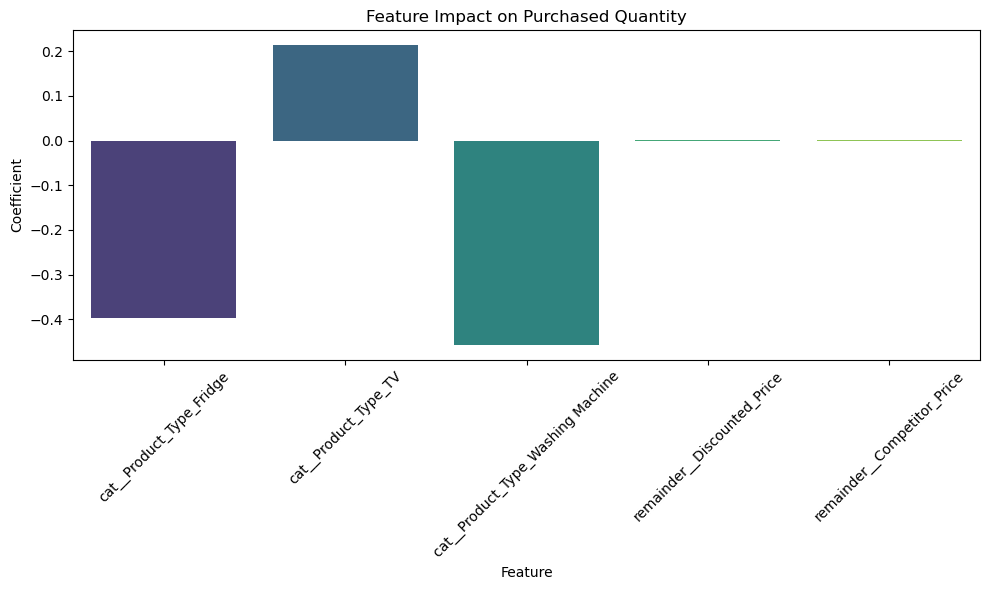

In [155]:
#Visualizations
plt.figure(figsize=(10, 6))
sns.barplot(data=coef_df, x='Feature', y='Coefficient', palette='viridis')
plt.title('Feature Impact on Purchased Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

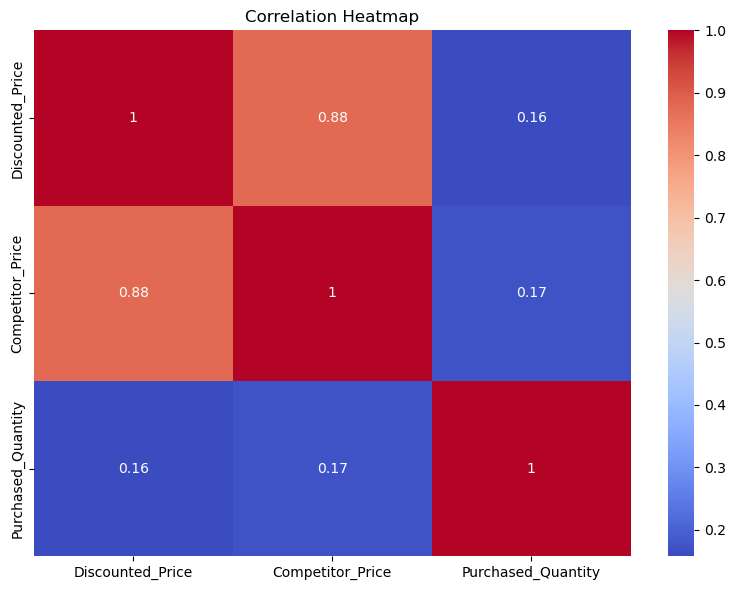

In [157]:
#Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(uploaded_df[['Discounted_Price', 'Competitor_Price', 'Purchased_Quantity']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

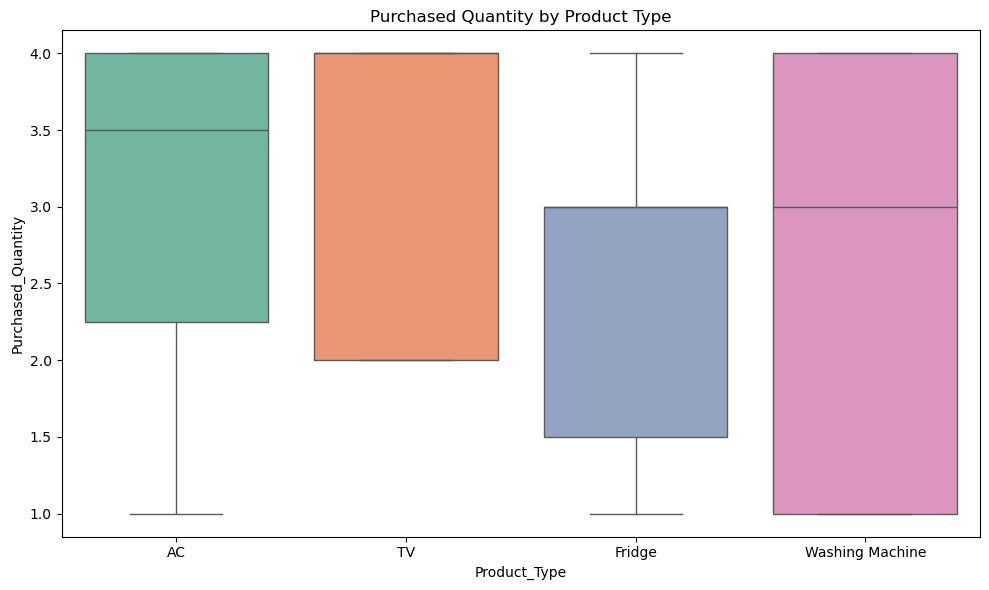

In [159]:
#Demand distribution by Product Type
plt.figure(figsize=(10, 6))
sns.boxplot(data=uploaded_df, x='Product_Type', y='Purchased_Quantity', palette='Set2')
plt.title('Purchased Quantity by Product Type')
plt.tight_layout()
plt.show()

In [ ]:
#save the model
joblib.dump(model_pipeline, 'pricing_demand_model.pkl')